## Tutorial implementing happy path on example dataset (gene expression, MRI)

### Initialisation

In [1]:
import sys
import os
import torch
sys.path.append(os.path.abspath(".."))

In [2]:
from adVAE.config import gene_expression, mri
from adVAE.training.train_gene_expression import train_model as train_gene
from adVAE.training.train_mri import train_model as train_mri
from adVAE.training.evaluate_gene_expression import evaluate_model as evaluate_gene
from adVAE.training.evaluate_mri import evaluate_model as evaluate_mri
from adVAE.visualization.visualize_gene_expression import visualize_latent_space as visualize_gene
from adVAE.visualization.visualize_mri import visualize_latent_space as visualize_mri
from adVAE.training.generate_synthetic_gene_expression import generate_and_save as generate_gene
from adVAE.training.generate_synthetic_mri import generate_and_save as generate_mri
from adVAE.data_preprocessing.gene_expression.preprocess import preprocess_pipeline as preprocess_gene
from adVAE.data_preprocessing.mri.preprocess import preprocess_pipeline as preprocess_mri

/opt/anaconda3/envs/adVAE/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/adVAE/lib/python3.10/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <5AA8DD3D-A2CC-31CA-8060-88B4E9C18B09> /opt/anaconda3/envs/adVAE/lib/python3.10/site-packages/torchvision/image.so
  Expected in:     <E459C462-F863-3A5A-AC9F-FD77B14BE845> /opt/anaconda3/envs/adVAE/lib/python3.10/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


### Implementing the gene expression-based pipeline

In [4]:
print("Gene Expression Configuration:", gene_expression)
cfg = gene_expression
cfg["data_folder"] = "../data/example_gene_expression"
cfg["data_path"] = "../data/processed/example_gene_expression.pt"
cfg["weights_path"] = "../results/gene_expression/model/vae_weights.pth"
cfg["results_dir"] = "../results/example_gene_expression"

Gene Expression Configuration: {'input_dim': 13, 'hidden_dim': 64, 'latent_dim': 32, 'batch_size': 64, 'epochs': 50, 'lr': 0.001, 'data_folder': 'data/AMP_AD_MSBB_MSSM', 'data_path': 'data/processed/gene_expression.pt', 'weights_path': 'results/gene_expression/model/vae_weights.pth', 'results_dir': 'results/gene_expression'}


**Data Preprocessing:**

In [5]:
df_scaled = preprocess_gene(data_folder=cfg["data_folder"], scale_method="standard", visualize=False, aggregate_by_gene=False, return_stats=False)
os.makedirs(os.path.dirname(cfg["data_path"]), exist_ok=True)
torch.save(torch.tensor(df_scaled.values, dtype=torch.float32), cfg["data_path"])
print(f"Gene expression data preprocessed and saved to {cfg['data_path']}")

Column 'ProbeID' not found — skipping duplicate removal.
Missing values filled: 0
Gene expression data preprocessed and saved to ../data/processed/example_gene_expression.pt


**Model Training:**

Training GeneExpressionVAE on gene expression data...
Epoch 1/50 - Loss: 10.1471 - Accuracy: 0.0849
Epoch 2/50 - Loss: 9.5482 - Accuracy: 0.0895
Epoch 3/50 - Loss: 9.5004 - Accuracy: 0.0899
Epoch 4/50 - Loss: 9.4802 - Accuracy: 0.0901
Epoch 5/50 - Loss: 9.4735 - Accuracy: 0.0901
Epoch 6/50 - Loss: 9.4687 - Accuracy: 0.0903
Epoch 7/50 - Loss: 9.4624 - Accuracy: 0.0903
Epoch 8/50 - Loss: 9.4612 - Accuracy: 0.0903
Epoch 9/50 - Loss: 9.4602 - Accuracy: 0.0903
Epoch 10/50 - Loss: 9.4601 - Accuracy: 0.0905
Epoch 11/50 - Loss: 9.4535 - Accuracy: 0.0905
Epoch 12/50 - Loss: 9.4512 - Accuracy: 0.0904
Epoch 13/50 - Loss: 9.4515 - Accuracy: 0.0905
Epoch 14/50 - Loss: 9.4514 - Accuracy: 0.0907
Epoch 15/50 - Loss: 9.4468 - Accuracy: 0.0905
Epoch 16/50 - Loss: 9.4509 - Accuracy: 0.0904
Epoch 17/50 - Loss: 9.4502 - Accuracy: 0.0903
Epoch 18/50 - Loss: 9.4452 - Accuracy: 0.0904
Epoch 19/50 - Loss: 9.4430 - Accuracy: 0.0904
Epoch 20/50 - Loss: 9.4415 - Accuracy: 0.0903
Epoch 21/50 - Loss: 9.4461 - Accur

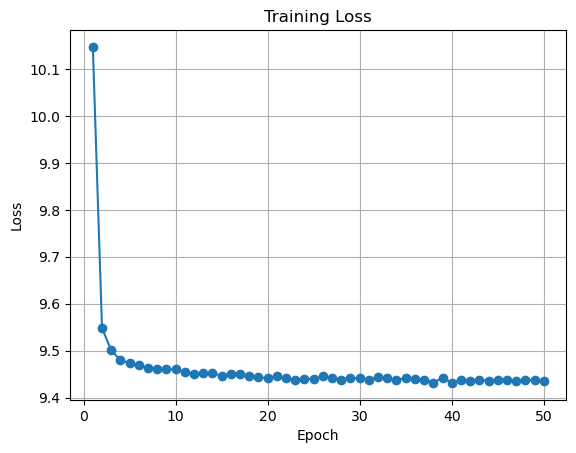

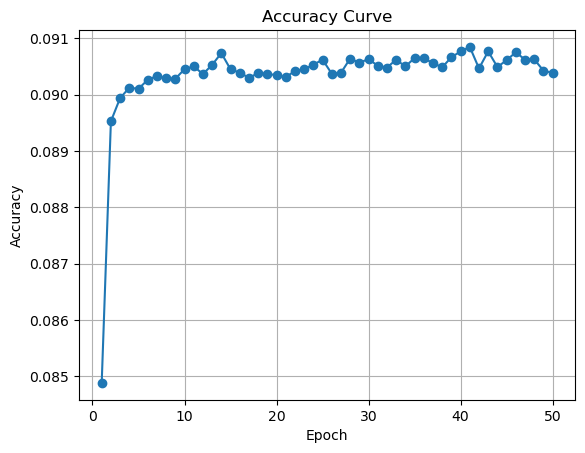

In [6]:
print("Training GeneExpressionVAE on gene expression data...")
train_gene(data_path=cfg["data_path"], input_dim=cfg["input_dim"], hidden_dim=cfg["hidden_dim"], latent_dim=cfg["latent_dim"],
           batch_size=cfg["batch_size"], epochs=cfg["epochs"], lr=cfg["lr"], save_dir=cfg["results_dir"])
print(f"Saved processed data to {cfg['results_dir']}")

**Model Evaluation:**

Evaluating performance of GeneExpressionVAE...
Reconstruction Accuracy: 0.0959
Mean Absolute Error: 0.5877
Reconstruction distribution plot saved to results/gene_expression/reconstruction_distribution.png
Finished evaluating performance


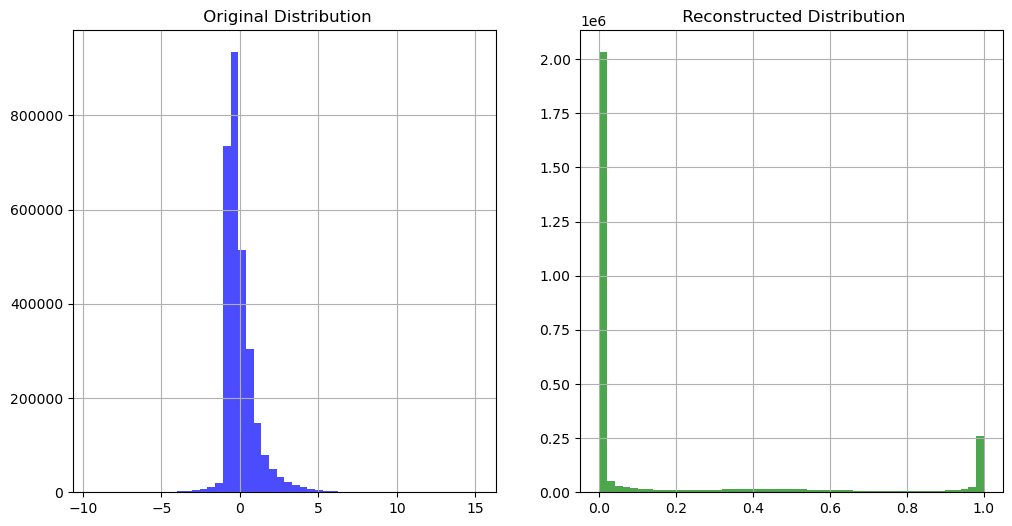

In [7]:
print("Evaluating performance of GeneExpressionVAE...")
evaluate_gene(model_path=cfg["weights_path"], data_path=cfg["data_path"], input_dim=cfg["input_dim"])
print(f"Finished evaluating performance")

**Model Visualisation:**

Visualizing latent space of GeneExpressionVAE...
Latent space plot saved to results/gene_expression/latent_pca.png
Finished visualizing the latent space


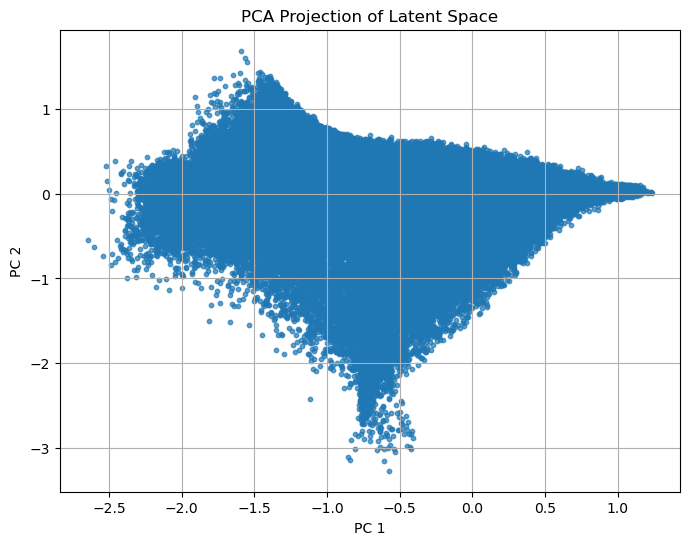

In [8]:
print("Visualizing latent space of GeneExpressionVAE...")
visualize_gene(model_path=cfg["weights_path"], data_path=cfg["data_path"], latent_dim=cfg["latent_dim"], input_dim=cfg["input_dim"])
print(f"Finished visualizing the latent space")

**Synthetic Gene Expression Data Generation:**

In [9]:
print("Generating synthetic gene expression data...")
generate_gene(model_path=cfg["weights_path"], latent_dim=cfg["latent_dim"], num_samples=50,
              input_dim=cfg["input_dim"], output_path=os.path.join(cfg["results_dir"], "synthetic_gene_expression.tsv"))
print(f"Finished generating synthetic data")

Generating synthetic gene expression data...
Generated 50 synthetic samples saved to ../results/example_gene_expression/synthetic_gene_expression.tsv
Finished generating synthetic data


### Implementing the MRI-based pipeline

In [3]:
print("MRI Configuration:", mri)
cfg = mri
cfg["data_folder"] = "../data/example_mri"
cfg["data_path"] = "../data/processed/example_mri.pt"
cfg["weights_path"] = "../results/mri/model/vae_weights.pth"
cfg["results_dir"] = "../results/example_mri"

MRI Configuration: {'latent_dim': 64, 'batch_size': 32, 'epochs': 30, 'lr': 0.001, 'data_folder': 'data/OASIS_1', 'data_path': 'data/processed/mri.pt', 'weights_path': 'results/mri/model/vae_weights.pth', 'results_dir': 'results/mri'}


**Data Preprocessing:**

In [4]:
print("Preprocessing MRI data...")
preprocess_mri(use_example_data=True)
print(f"Saved processed MRI data to {cfg['data_path']}")

Preprocessing MRI data...
Using example MRI data...
Loaded OAS1_0003_MR1: shape torch.Size([3, 128, 128])
Skipping OAS1_0015_MR1 — insufficient slices found.
Skipping OAS1_0016_MR1 — insufficient slices found.
Loaded OAS1_0021_MR1: shape torch.Size([3, 128, 128])
Loaded OAS1_0022_MR1: shape torch.Size([3, 128, 128])
Skipping OAS1_0023_MR1 — insufficient slices found.
Skipping OAS1_0028_MR1 — insufficient slices found.
Skipping OAS1_0031_MR1 — insufficient slices found.
Skipping OAS1_0035_MR1 — insufficient slices found.
Skipping OAS1_0039_MR1 — insufficient slices found.
Skipping OAS1_0041_MR1 — insufficient slices found.
Skipping OAS1_0042_MR1 — insufficient slices found.
Skipping OAS1_0046_MR1 — insufficient slices found.
Skipping OAS1_0052_MR1 — insufficient slices found.
Skipping OAS1_0053_MR1 — insufficient slices found.
Skipping OAS1_0056_MR1 — insufficient slices found.
Skipping OAS1_0060_MR1 — insufficient slices found.
Skipping OAS1_0066_MR1 — insufficient slices found.
Skippi

**Model Training:**

Training MRIVAE on MRI data...
Epoch 1/30 - Loss: 18170.1693 - Accuracy: 0.0413
Epoch 2/30 - Loss: 17162.4427 - Accuracy: 0.0516
Epoch 3/30 - Loss: 13106.0000 - Accuracy: 0.1469
Epoch 4/30 - Loss: 10499.2526 - Accuracy: 0.1754
Epoch 5/30 - Loss: 8366.8210 - Accuracy: 0.1910
Epoch 6/30 - Loss: 6018.4290 - Accuracy: 0.2211
Epoch 7/30 - Loss: 5784.3867 - Accuracy: 0.2629
Epoch 8/30 - Loss: 4565.7126 - Accuracy: 0.2880
Epoch 9/30 - Loss: 4090.5081 - Accuracy: 0.2718
Epoch 10/30 - Loss: 4129.7910 - Accuracy: 0.2611
Epoch 11/30 - Loss: 3399.8047 - Accuracy: 0.3798
Epoch 12/30 - Loss: 3658.5016 - Accuracy: 0.4465
Epoch 13/30 - Loss: 3387.9453 - Accuracy: 0.4607
Epoch 14/30 - Loss: 2999.4785 - Accuracy: 0.4580
Epoch 15/30 - Loss: 2941.4860 - Accuracy: 0.4307
Epoch 16/30 - Loss: 3188.0739 - Accuracy: 0.3761
Epoch 17/30 - Loss: 2861.3047 - Accuracy: 0.4090
Epoch 18/30 - Loss: 2650.4495 - Accuracy: 0.4359
Epoch 19/30 - Loss: 2731.3822 - Accuracy: 0.4407
Epoch 20/30 - Loss: 2752.5205 - Accuracy: 0

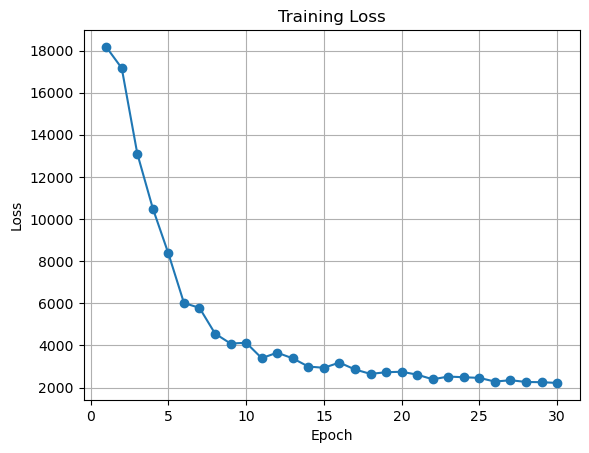

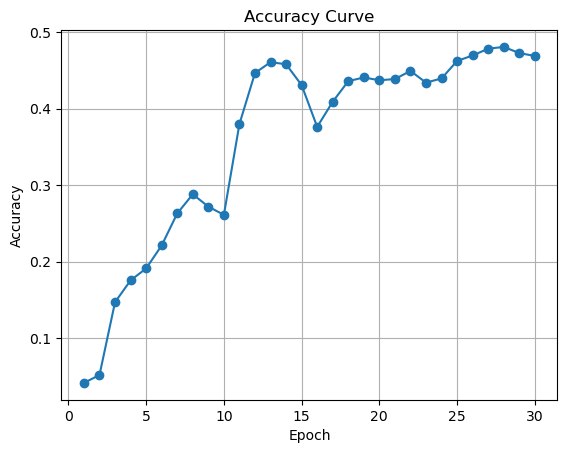

In [6]:
print("Training MRIVAE on MRI data...")
train_mri(data_path=cfg["data_path"], latent_dim=cfg["latent_dim"], batch_size=cfg["batch_size"],
          epochs=cfg["epochs"], lr=cfg["lr"], save_dir=cfg["results_dir"])
print(f"Saved processed data to {cfg['results_dir']}")

**Model Evaluation:**

Evaluating performance of MRIVAE...
Reconstruction Accuracy: 0.4340
Mean Absolute Error: 0.1574
Reconstruction distribution plot saved to results/mri/reconstruction_distribution.png
Finished evaluating performance


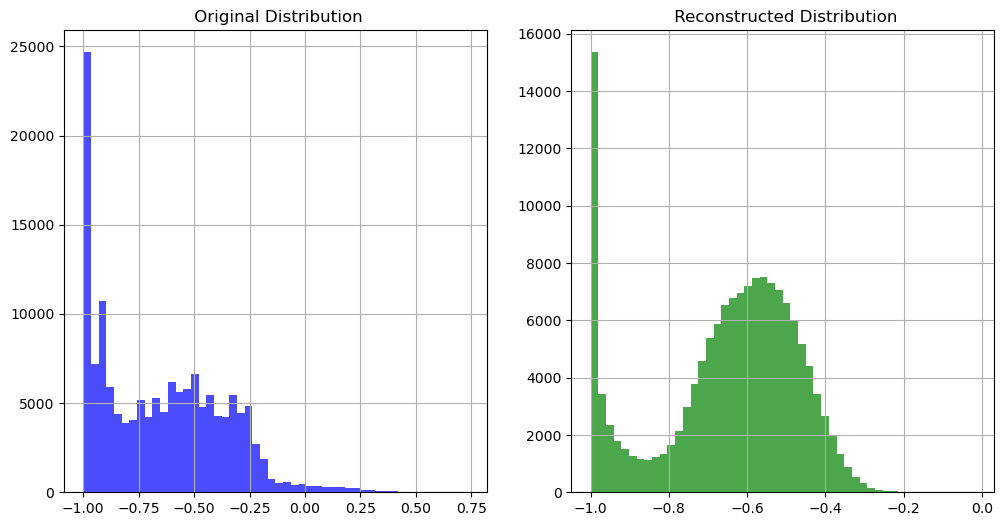

In [7]:
print("Evaluating performance of MRIVAE...")
evaluate_mri(model_path=cfg["weights_path"], data_path=cfg["data_path"], latent_dim=cfg["latent_dim"])
print(f"Finished evaluating performance")

**Model Visualisation:**

Visualizing latent space of MRIVAE...
Latent space plot saved to results/mri/latent_pca.png
Finished visualizing the latent space


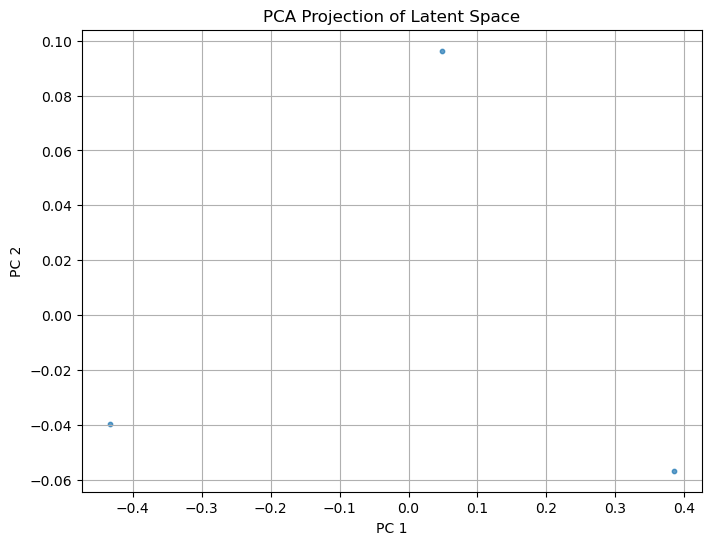

In [8]:
print("Visualizing latent space of MRIVAE...")
visualize_mri(model_path=cfg["weights_path"], data_path=cfg["data_path"], latent_dim=cfg["latent_dim"])
print(f"Finished visualizing the latent space")

**Synthetic MRI Data Generation:**

In [9]:
print("Generating synthetic MRI data...")
generate_mri(model_path=cfg["weights_path"], latent_dim=cfg["latent_dim"], num_samples=50,
             output_dir=os.path.join(cfg["results_dir"], "synthetic_gifs"))
print(f"Finished generating synthetic data")

Generating synthetic MRI data...
Saved 150 synthetic MRI GIFs to ../results/example_mri/synthetic_gifs
Finished generating synthetic data
